In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [3]:

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

In [4]:
df.to_csv('../datasets/energydata_complete.csv' , index=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [8]:
df = df.set_index('date')

In [9]:
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

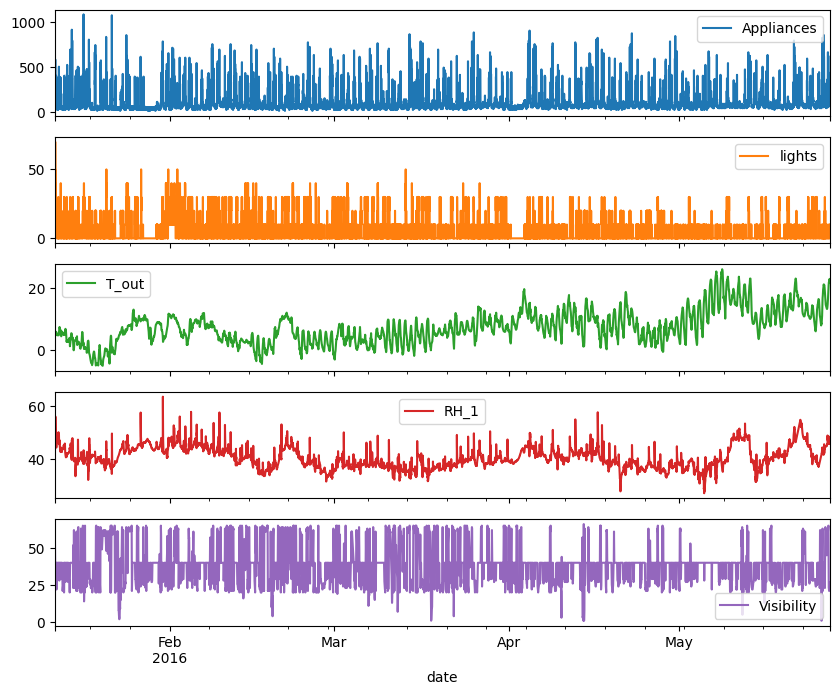

In [10]:
df[['Appliances', 'lights','T_out', 'RH_1', 'Visibility']].plot(subplots=True)

<Axes: xlabel='date'>

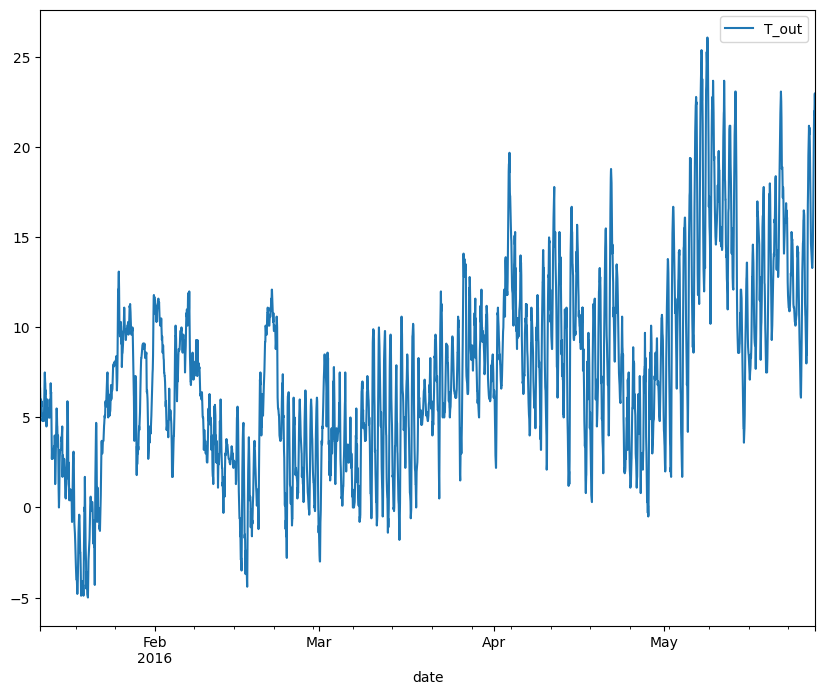

In [11]:
df[['T_out']].plot()

<Axes: xlabel='date'>

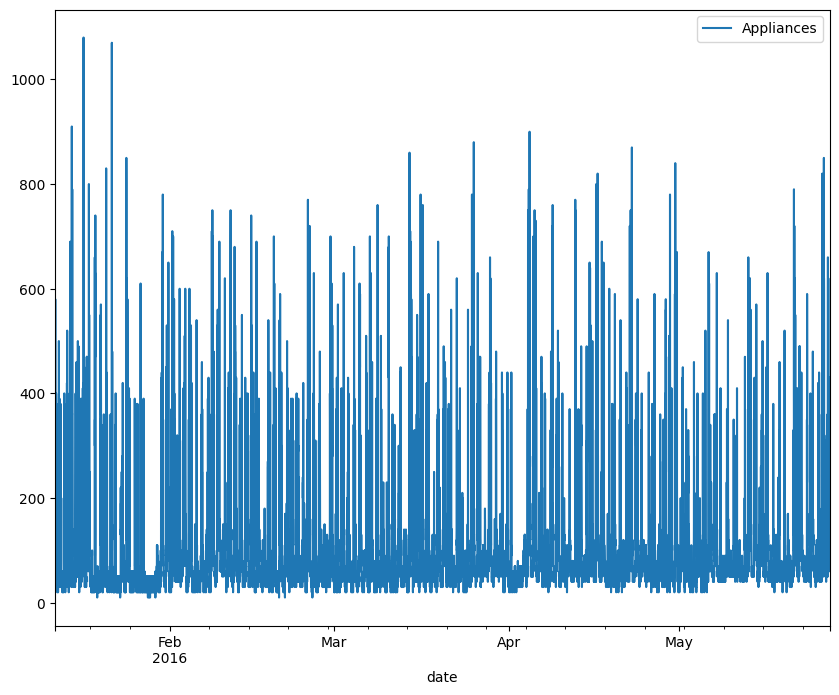

In [12]:
df[['Appliances']].plot()

<Axes: xlabel='date'>

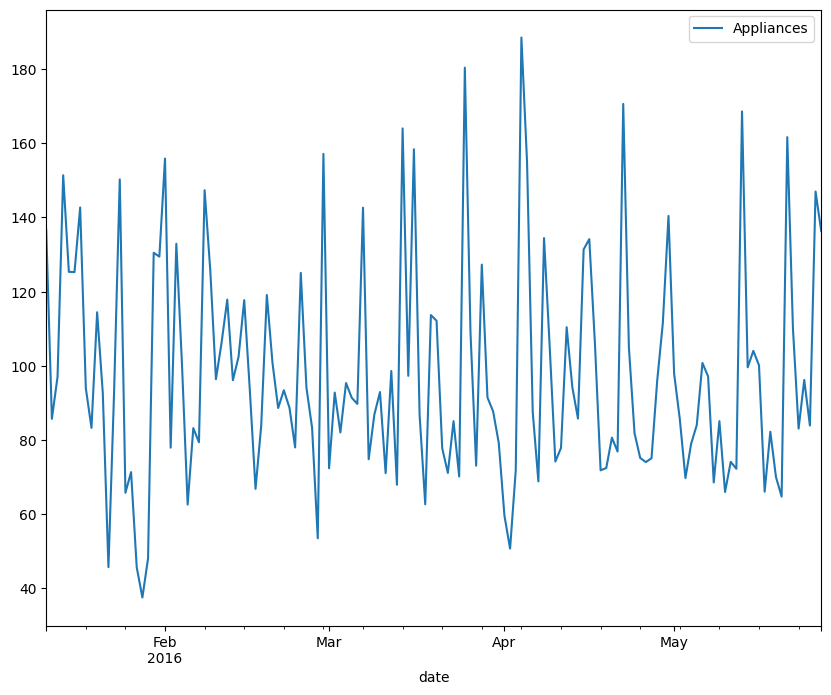

In [13]:
df[['Appliances']].resample('D').mean().plot()

<Axes: xlabel='date'>

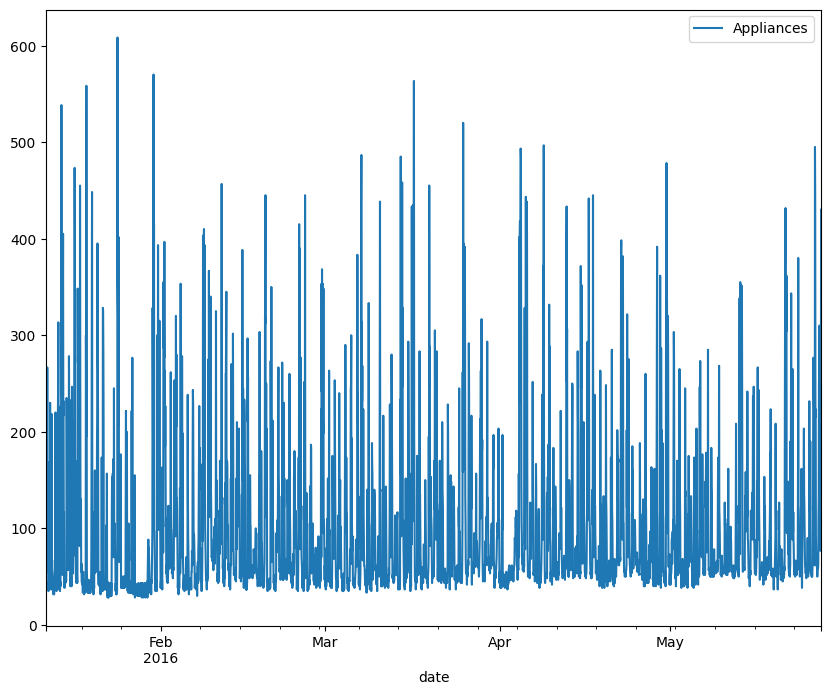

In [14]:
df[['Appliances']].resample('h').mean().plot()

In [15]:
ndf = df_input=df[['Appliances','T_out', 'RH_2', 'Visibility']]
ndf.head(5)

,Appliances,T_out,RH_2,Visibility
date,,,,
2016-01-11 17:00:00,60,6.600000,44.790000,63.000000
2016-01-11 17:10:00,60,6.483333,44.722500,59.166667
2016-01-11 17:20:00,50,6.366667,44.626667,55.333333
2016-01-11 17:30:00,50,6.250000,44.590000,51.500000
2016-01-11 17:40:00,60,6.133333,44.530000,47.666667


In [16]:
ndf.describe()

,Appliances,T_out,RH_2,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,7.411665,40.420420,38.330834
std,102.524891,5.317409,4.069813,11.794719
min,10.000000,-5.000000,20.463333,1.000000
25%,50.000000,3.666667,37.900000,29.000000
50%,60.000000,6.916667,40.500000,40.000000
75%,100.000000,10.408333,43.260000,40.000000
max,1080.000000,26.100000,56.026667,66.000000


In [17]:
features = df[['Appliances','T_out', 'RH_2']].to_numpy().tolist()
target = df['Appliances'].tolist()

In [18]:
features[0:5], target[:5]

([[60.0, 6.6, 44.79],
  [60.0, 6.48333333333333, 44.7225],
  [50.0, 6.36666666666667, 44.6266666666667],
  [50.0, 6.25, 44.59],
  [60.0, 6.133333333333329, 44.53]],
 [60, 60, 50, 50, 60])

In [19]:
ts_generator = TimeseriesGenerator(features, target,length=6, sampling_rate=1,batch_size=1)

#sampling_rate 1 means we need continuous data to be predicted
#sampling rate 3 means we need data at next 3 steps likewise for any n
#length = 6, means input width

In [20]:
ts_generator

In [21]:
ts_generator[0]  #shows 6 inputs and target output

(array([[[60.        ,  6.6       , 44.79      ],
         [60.        ,  6.48333333, 44.7225    ],
         [50.        ,  6.36666667, 44.62666667],
         [50.        ,  6.25      , 44.59      ],
         [60.        ,  6.13333333, 44.53      ],
         [50.        ,  6.01666667, 44.5       ]]]),
 array([60]))

In [22]:
ts_generator[1]

(array([[[60.        ,  6.48333333, 44.7225    ],
         [50.        ,  6.36666667, 44.62666667],
         [50.        ,  6.25      , 44.59      ],
         [60.        ,  6.13333333, 44.53      ],
         [50.        ,  6.01666667, 44.5       ],
         [60.        ,  5.9       , 44.5       ]]]),
 array([60]))

In [23]:
ts_generator[5]

(array([[[ 50.        ,   6.01666667,  44.5       ],
         [ 60.        ,   5.9       ,  44.5       ],
         [ 60.        ,   5.91666667,  44.5       ],
         [ 60.        ,   5.93333333,  44.43333333],
         [ 70.        ,   5.95      ,  44.4       ],
         [230.        ,   5.96666667,  44.4       ]]]),
 array([580]))

In [24]:
len(ts_generator)

19729

In [25]:
ts_generator2 = TimeseriesGenerator(features,target,sampling_rate=1,length=6, stride=2, batch_size=1)

In [26]:
ts_generator2[0]

(array([[[60.        ,  6.6       , 44.79      ],
         [60.        ,  6.48333333, 44.7225    ],
         [50.        ,  6.36666667, 44.62666667],
         [50.        ,  6.25      , 44.59      ],
         [60.        ,  6.13333333, 44.53      ],
         [50.        ,  6.01666667, 44.5       ]]]),
 array([60]))

In [27]:
ts_generator2[1]

(array([[[50.        ,  6.36666667, 44.62666667],
         [50.        ,  6.25      , 44.59      ],
         [60.        ,  6.13333333, 44.53      ],
         [50.        ,  6.01666667, 44.5       ],
         [60.        ,  5.9       , 44.5       ],
         [60.        ,  5.91666667, 44.5       ]]]),
 array([60]))

In [28]:
len(ts_generator2)

9865

Multiple target prediction

In [29]:
pd.concat([ndf['Appliances'], ndf['Appliances'].shift(-1), ndf['Appliances'].shift(-2)] ,axis=1)

,Appliances,Appliances,Appliances
date,,,
2016-01-11 17:00:00,60,60.0,50.0
2016-01-11 17:10:00,60,50.0,50.0
2016-01-11 17:20:00,50,50.0,60.0
2016-01-11 17:30:00,50,60.0,50.0
2016-01-11 17:40:00,60,50.0,60.0
...,...,...,...
2016-05-27 17:20:00,100,90.0,270.0
2016-05-27 17:30:00,90,270.0,420.0
2016-05-27 17:40:00,270,420.0,430.0


In [30]:
multitarget = pd.concat([ndf['Appliances'], ndf['Appliances'].shift(-1), ndf['Appliances'].shift(-2)] ,axis=1).dropna().to_numpy().tolist()

In [31]:
multitarget[:10]

[[60.0, 60.0, 50.0],
 [60.0, 50.0, 50.0],
 [50.0, 50.0, 60.0],
 [50.0, 60.0, 50.0],
 [60.0, 50.0, 60.0],
 [50.0, 60.0, 60.0],
 [60.0, 60.0, 60.0],
 [60.0, 60.0, 70.0],
 [60.0, 70.0, 230.0],
 [70.0, 230.0, 580.0]]

In [32]:
multigenerator = TimeseriesGenerator(features[:-2], multitarget,length=6,sampling_rate=1 , batch_size=1, stride=6)  
#stride=length becomes tumbling window
#omit 2 features length , because 2 NAN values were dropped.

In [33]:
multigenerator[0]

(array([[[60.        ,  6.6       , 44.79      ],
         [60.        ,  6.48333333, 44.7225    ],
         [50.        ,  6.36666667, 44.62666667],
         [50.        ,  6.25      , 44.59      ],
         [60.        ,  6.13333333, 44.53      ],
         [50.        ,  6.01666667, 44.5       ]]]),
 array([[60., 60., 60.]]))

In [35]:
len(multigenerator)

3288